In [2]:
import pandas as pd

result_tech = pd.read_csv('updated_df_tech.csv')
result_pol = pd.read_csv('updated_df_pol.csv')
result_enter = pd.read_csv('updated_df_enter.csv')
result_entrep = pd.read_csv('updated_df_entrep.csv')
result_celeb = pd.read_csv('updated_df_celeb.csv')
result_merged = pd.read_csv('updated_df_merged.csv')
result_others = pd.read_csv('updated_df_others.csv')

list(result_enter.columns.values)

['Unnamed: 0.1',
 'Unnamed: 0',
 'Username',
 'Text',
 'Date Created',
 'Number of Likes',
 'Number of Retweet',
 'Number of Replies',
 'Source of Tweet',
 'User ID',
 'Conversation ID',
 'status',
 'Category',
 'translated',
 'translated cleaned',
 'sentiment Scores',
 'sentiment',
 'sentiment_label',
 'SVM Predicted Label']

In [3]:
#import tweepy
#import pandas as pd
#
#apikey = "AsK2XEpz4kS0k7E7zPKt5CEbV"
#apisecretkey = "vNJH6zGiR64BQrD4K6TCTSPRS7nO2mCnhcHuxpr7PxoB6iscpJ"
#clientid = "TnpWNFhaR3Rjc29ELXNPYUZpeUI6MTpjaQ"
#clientsecret = "qq2HS520uKTwSAV6z5Gmy0gCR-AbHFA8Cvr08jWKE3IW3TTeJ9"
#accesstoken = "1525783737371226114-nE6DQYbEeoKD2kHXO5e06UVTsAqec4"
#accesstokensecret = "tjD44wNFWOxZlA8umvczzNuXDluz5uQjF9eGQsFUW9sGC"
#bearertoken = "AAAAAAAAAAAAAAAAAAAAAA4yoQEAAAAA%2FjqcusIoMTeN8YgemjG7dhKRo4A%3DtuAt5jA94bJ2aG4p0EZwdvzreFMKD98hmK0aDDkVD7srBnBuIR"
#
#user_categories = {
#    'Entertainer': ['sofyank96', 'LuqmanPodolski', 'hazemanhuzir','CeddyOrNot', 'brgsjks', 'Azfarheri', 'Matluthfi90' ],
#    'Politics': ['chairman_GLC', 'Khairykj', 'MuhyiddinYassin', 'limlipeng', 'kuasasiswa', 'NajibRazak', 'n_izzah', 'anwaribrahim', 'SyedSaddiq'],
#    'Technology': ['XavierNaxa', 'fazlihalimmedia', 'thefaizzainal','aribismail','acaiijawe' ],
#    'Celebrity': ['altimet', 'AfikryAibrahim', 'yunamusic', 'CTNurhaliza11', 'AaronDwiAziz', 'missfazura','Nor4Danish','Shaheizy_Sam' ],
#    'Entrepreneur': ['FezzaHussin', 'adibhazlami', 'afiqnazary','AmirulMu_min', 'richardker', 'IZZTAZWAR', 'khairulaming'],
#    'Fitness and others': ['najibfazail', 'fedtriyahya', 'Pandelela_R', 'ijaicool', "DrAmalinaBakri"]
#}
#
#
#
##Authenticate with Twitter API using OAuth 1.0a authentication
#auth = tweepy.OAuth1UserHandler(apikey,apisecretkey,accesstoken,accesstokensecret)
#
#
##Create the API object
#api = tweepy.API(auth)
#
##Define a list of dictionaries to store the data
#data = []
#
##Loop over the user_categories dictionary
#for category, usernames in user_categories.items():
## Loop over the usernames in the category
#    for username in usernames:
## Use API.get_user() method to get information about the user
#        user = api.get_user(screen_name=username)
#
# # Retrieve the number of followers from the user object
#        followers_count = user.followers_count
#    
#    # Add the data to the list of dictionaries
#        data.append({
#        'Category': category,
#        'Username': username,
#        'followers_count': followers_count
#    })
#
##Create a DataFrame from the list of dictionaries
#df = pd.DataFrame(data)
#
##Print the DataFrame
#print(df)

In [4]:
df = pd.read_csv("followers_count.csv")

# SYED SADDIQ

In [5]:
dataframe = result_pol
username = "SyedSaddiq"

# Filter result_pol by username
mainpost = dataframe[dataframe['Username'] == username]

# Get the list of conversation IDs for SyedSaddiq's posts
mainconvid = mainpost['Conversation ID'].tolist()

# Filter result_pol by conversation IDs that are replies to SyedSaddiq's posts
reply = result_pol[result_pol['Conversation ID'].isin(mainconvid)]

# Convert sentiment labels to numeric values
reply['sentiment_label'] = reply['sentiment_label'].map({'Positive': 1, 'Negative': -1})

# Group the data by Conversation ID and sum the sentiment labels
sentiment_counts = reply.groupby('Conversation ID')['sentiment_label'].sum()

# Map the sentiment counts to the syedsaddiqpost DataFrame using Conversation ID
mainpost['Sentiment Aggregation Count'] = mainpost['Conversation ID'].map(sentiment_counts)

#Setting the mean and standard deviation of the sentiment counts
mean_count = sentiment_counts.mean()
std_count = sentiment_counts.std()

# Define the bin edges for the categories
bin_edges = [-float('inf'), -mean_count-std_count,0, mean_count+std_count, float('inf')]

# Create labels for the categories
labels = ['High Negative','Low Negative','Low Positive', 'High Positive']

# Use pd.cut to categorize the positive values based on the bin edges and labels
category = pd.cut(sentiment_counts, bins=bin_edges, labels=labels)

# Map the sentiment category to the syedsaddiqpost DataFrame using Conversation ID
mainpost['Sentiment Aggregation Category'] = mainpost['Conversation ID'].map(category)

# Filter the DataFrame by Username
username_followers_count = df[df['Username'] == username]['followers_count']

# Insert the followers count column
mainpost.loc[:, 'Followers Count'] = username_followers_count.values[0]

# Calculate engagement rate for each row where status is "Main post"
mainpost["Engagement Rate"] = (mainpost['Number of Likes'] +mainpost['Number of Retweet'] +mainpost['Number of Replies']) / mainpost["Followers Count"]

# Setting the mean and standard deviation of the Engagement Rate
mean_count = mainpost["Engagement Rate"].mean()
std_count = mainpost["Engagement Rate"].std()

# Define the bin edges for the categories
bin_edges = [0, mean_count + std_count, float('inf')]

# Create labels for the categories
labels = ['Low Engagement Rate', 'High Engagement Rate']

# Use pd.cut to categorize the engagement rate based on the bin edges and labels
category = pd.cut(mainpost["Engagement Rate"], bins=bin_edges, labels=labels)

# Assign the "category" column to syedsaddiqpost
mainpost["Engagement Rate Category"] = category

category_counts = mainpost.groupby(['Engagement Rate Category', 'Sentiment Aggregation Category']).size()

# Print the count of each category
print(category_counts)



Engagement Rate Category  Sentiment Aggregation Category
Low Engagement Rate       High Negative                      2
                          Low Negative                      29
                          Low Positive                      49
                          High Positive                      5
High Engagement Rate      High Negative                      0
                          Low Negative                       4
                          Low Positive                       5
                          High Positive                      4
dtype: int64


C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\2353375061.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reply['sentiment_label'] = reply['sentiment_label'].map({'Positive': 1, 'Negative': -1})
C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\2353375061.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainpost['Sentiment Aggregation Count'] = mainpost['Conversation ID'].map(sentiment_counts)
C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\2353375061.py:36: SettingWithCopyWarning: 
A value is

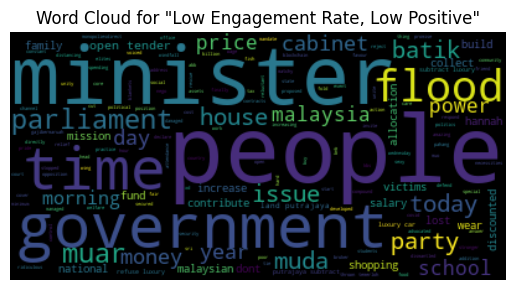

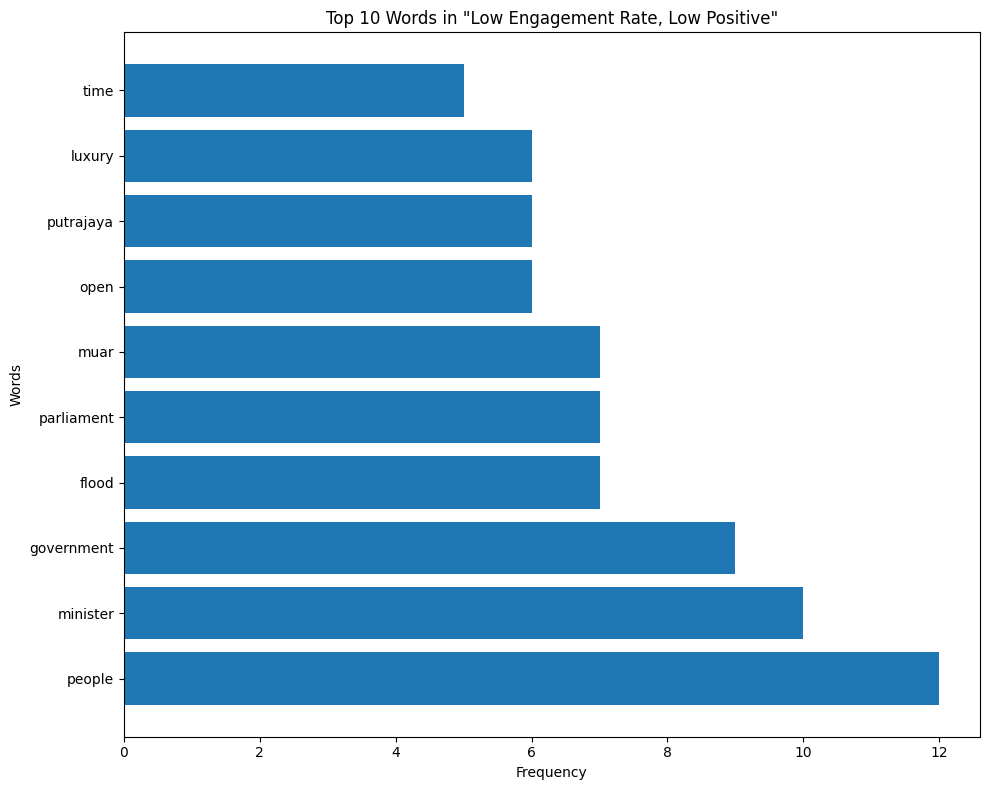

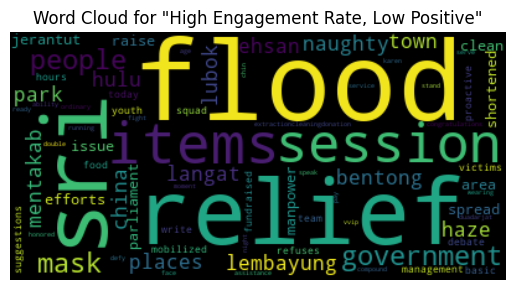

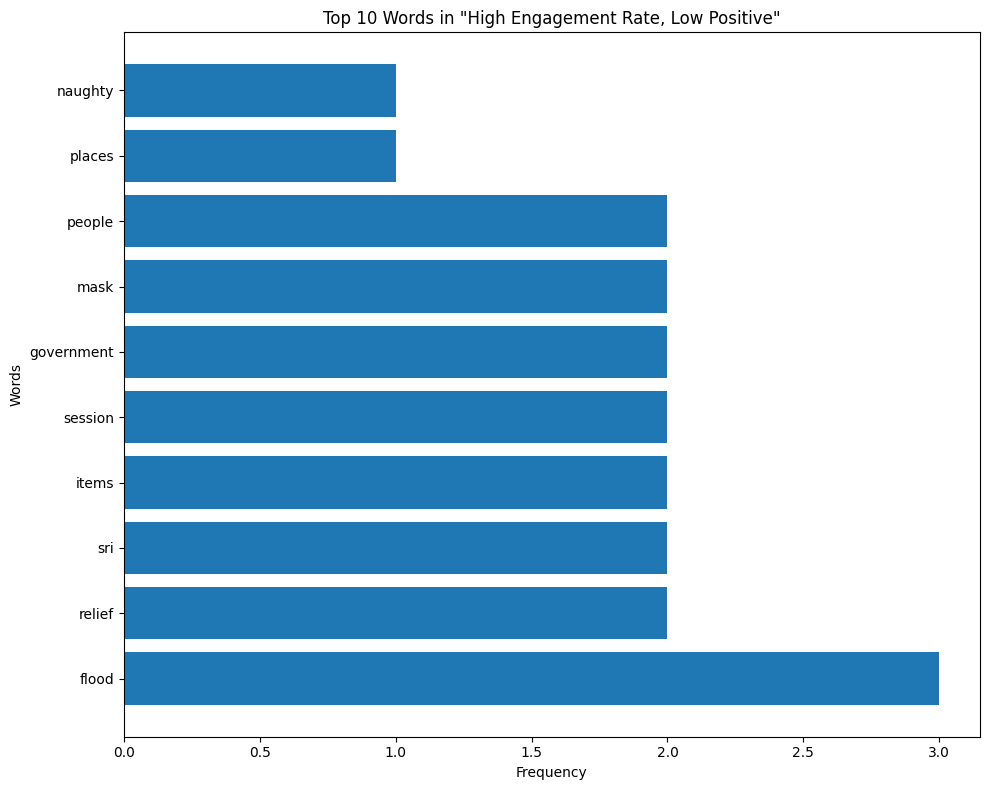

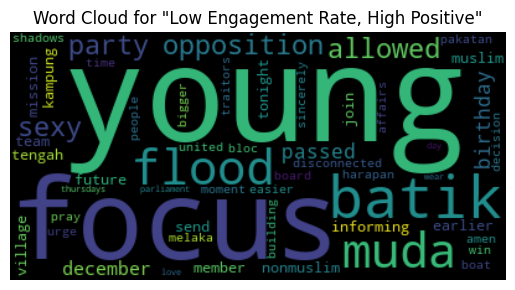

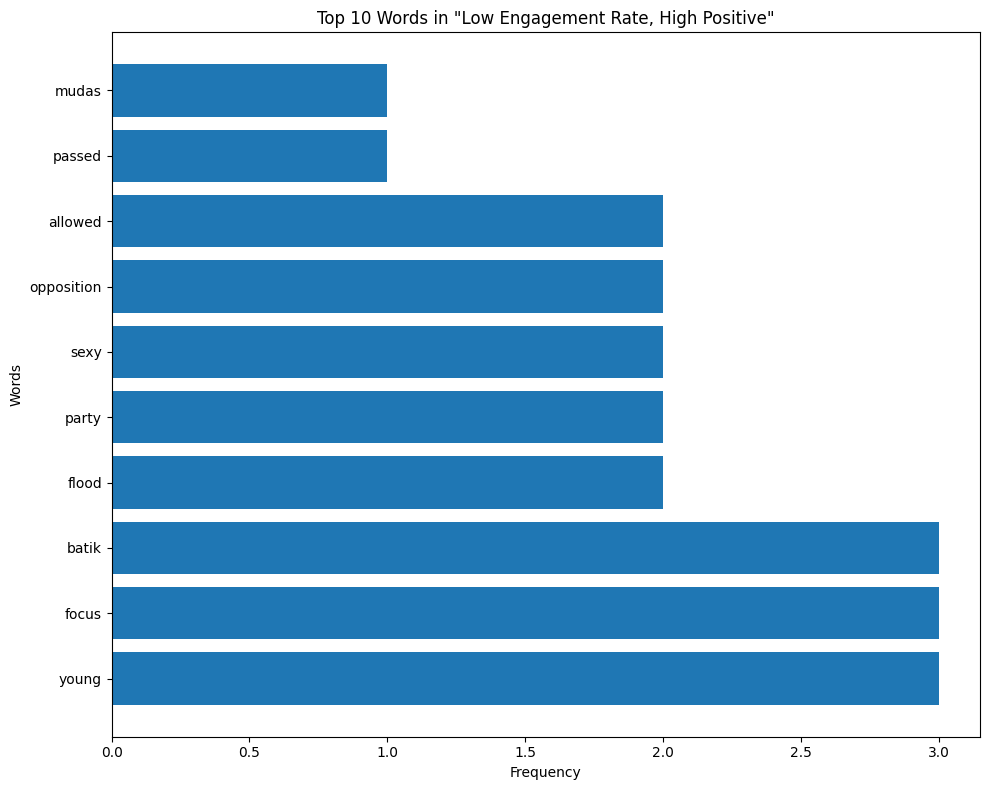

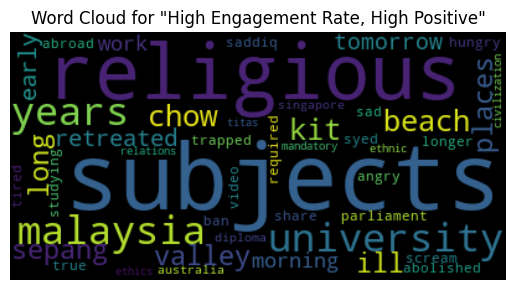

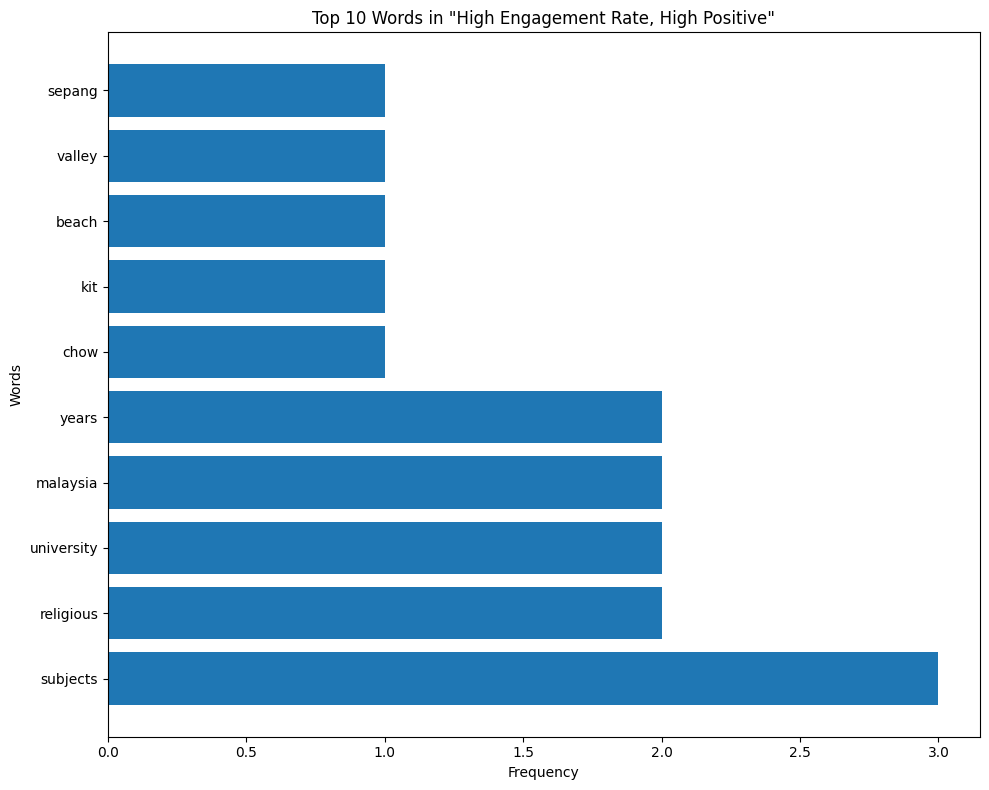

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

categories = [
    ('Low Engagement Rate', 'Low Positive', 'Low Engagement Rate, Low Positive'),
    ('High Engagement Rate', 'Low Positive', 'High Engagement Rate, Low Positive'),
    ('Low Engagement Rate', 'High Positive', 'Low Engagement Rate, High Positive'),
    ('High Engagement Rate', 'High Positive', 'High Engagement Rate, High Positive')
]

# Loop through the categories
for engagement_category, sentiment_category, title in categories:
    filtered_data = mainpost[(mainpost['Engagement Rate Category'] == engagement_category) & (mainpost['Sentiment Aggregation Category'] == sentiment_category)]
    text = ' '.join(filtered_data['translated cleaned'])

    # Generate word cloud
    wordcloud = WordCloud().generate(text)

    # Plot word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for "{title}"')
    plt.show()

    # Count the frequency of occurrences of each word
    word_frequency = Counter(text.split())

    # Get the top 20 words and their frequencies
    top_words = dict(word_frequency.most_common(10))
    sorted_words = list(top_words.keys())
    sorted_frequencies = list(top_words.values())

    # Increase the figure size
    plt.figure(figsize=(10, 8))

    # Create a horizontal bar chart
    plt.barh(sorted_words, sorted_frequencies, height=0.8)  # Increase the bar size

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top 10 Words in "{title}"')

    plt.tight_layout()  # Adjust the spacing
    plt.show()


In [7]:
engagement_category = 'Low Engagement Rate'
sentiment_category = 'Low Negative'

filtered_data = mainpost[(mainpost['Engagement Rate Category'] == engagement_category) & (mainpost['Sentiment Aggregation Category'] == sentiment_category)]

# Filter rows containing the keyword
rows_with_keywords = filtered_data[filtered_data['translated cleaned'].str.contains('wait', case=False)]

# Display the full text of the "Text" column
print(rows_with_keywords["Text"])

351    Saya minta maaf sangat sangat. Memang banyak D...
384    Memalukan.\nMenjijikkan.\nMenjengkelkan.\n\nBu...
388    Semalam, saya bahas bahawa Belanjawan 2022 har...
474    Memalukan.\nMenjijikkan.\nMenjengkelkan.\n\nBu...
Name: Text, dtype: object


# KHAIRUL AMING

In [8]:
dataframe = result_entrep
username = "khairulaming"

# Filter result_pol by username
mainpost = dataframe[dataframe['Username'] == username]

# Get the list of conversation IDs for SyedSaddiq's posts
mainconvid = mainpost['Conversation ID'].tolist()

# Filter result_pol by conversation IDs that are replies to SyedSaddiq's posts
reply =dataframe[dataframe['Conversation ID'].isin(mainconvid)]

# Convert sentiment labels to numeric values
reply['sentiment_label'] = reply['sentiment_label'].map({'Positive': 1, 'Negative': -1})

# Group the data by Conversation ID and sum the sentiment labels
sentiment_counts = reply.groupby('Conversation ID')['sentiment_label'].sum()

# Map the sentiment counts to the syedsaddiqpost DataFrame using Conversation ID
mainpost['Sentiment Aggregation Count'] = mainpost['Conversation ID'].map(sentiment_counts)

#Setting the mean and standard deviation of the sentiment counts
mean_count = sentiment_counts.median()
std_count = sentiment_counts.std()

# Define the bin edges for the categories
bin_edges = [-float('inf'), -mean_count-std_count,0, mean_count+std_count, float('inf')]

# Create labels for the categories
labels = ['High Negative','Low Negative','Low Positive', 'High Positive']

# Use pd.cut to categorize the positive values based on the bin edges and labels
category = pd.cut(sentiment_counts, bins=bin_edges, labels=labels)

# Map the sentiment category to the syedsaddiqpost DataFrame using Conversation ID
mainpost['Sentiment Aggregation Category'] = mainpost['Conversation ID'].map(category)

# Filter the DataFrame by Username
username_followers_count = df[df['Username'] == username]['followers_count']

# Insert the followers count column
mainpost.loc[:, 'Followers Count'] = username_followers_count.values[0]

# Calculate engagement rate for each row where status is "Main post"
mainpost["Engagement Rate"] = (mainpost['Number of Likes'] +mainpost['Number of Retweet'] +mainpost['Number of Replies']) / mainpost["Followers Count"]

# Setting the mean and standard deviation of the Engagement Rate
mean_count = mainpost["Engagement Rate"].median()
std_count = mainpost["Engagement Rate"].std()

# Define the bin edges for the categories
bin_edges = [0, mean_count + std_count, float('inf')]

# Create labels for the categories
labels = ['Low Engagement Rate', 'High Engagement Rate']

# Use pd.cut to categorize the engagement rate based on the bin edges and labels
category = pd.cut(mainpost["Engagement Rate"], bins=bin_edges, labels=labels)

# Assign the "category" column to syedsaddiqpost
mainpost["Engagement Rate Category"] = category

category_counts = mainpost.groupby(['Engagement Rate Category', 'Sentiment Aggregation Category']).size()

# Print the count of each category
print(category_counts)



Engagement Rate Category  Sentiment Aggregation Category
Low Engagement Rate       High Negative                       0
                          Low Negative                       15
                          Low Positive                      110
                          High Positive                      17
High Engagement Rate      High Negative                       0
                          Low Negative                        6
                          Low Positive                       20
                          High Positive                       8
dtype: int64


C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\3485882683.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reply['sentiment_label'] = reply['sentiment_label'].map({'Positive': 1, 'Negative': -1})
C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\3485882683.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainpost['Sentiment Aggregation Count'] = mainpost['Conversation ID'].map(sentiment_counts)
C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\3485882683.py:36: SettingWithCopyWarning: 
A value is

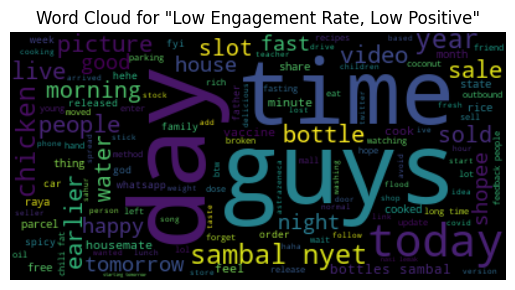

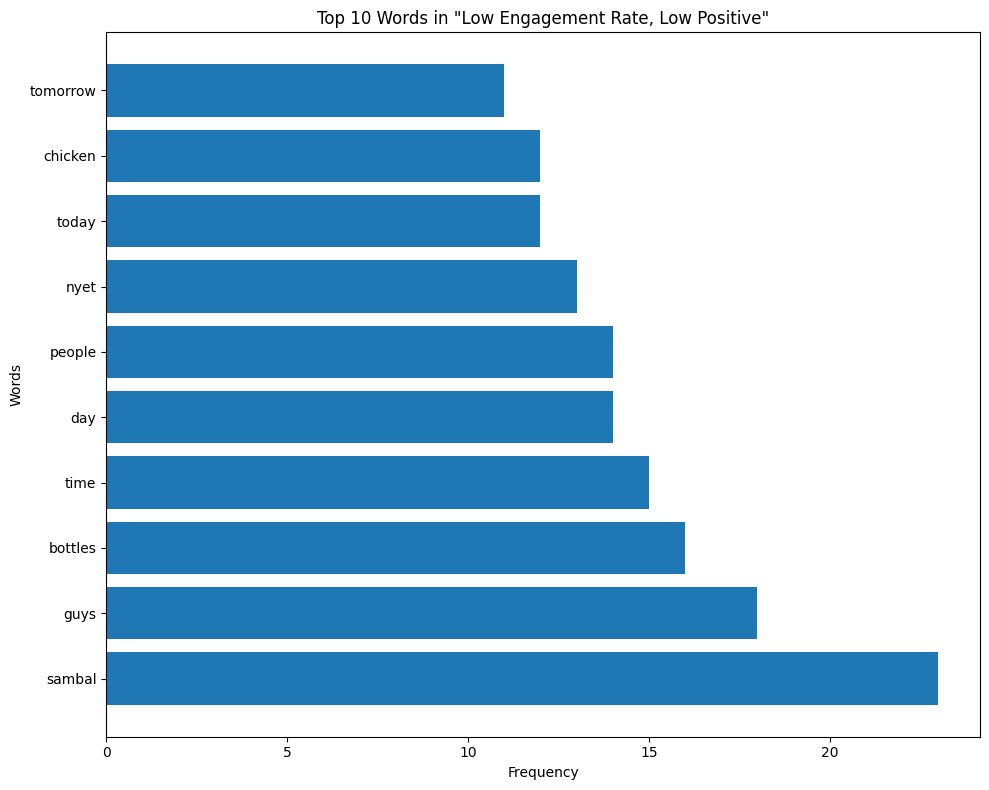

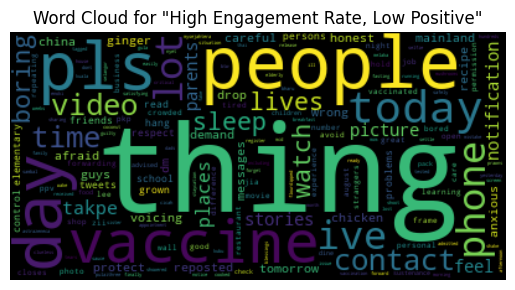

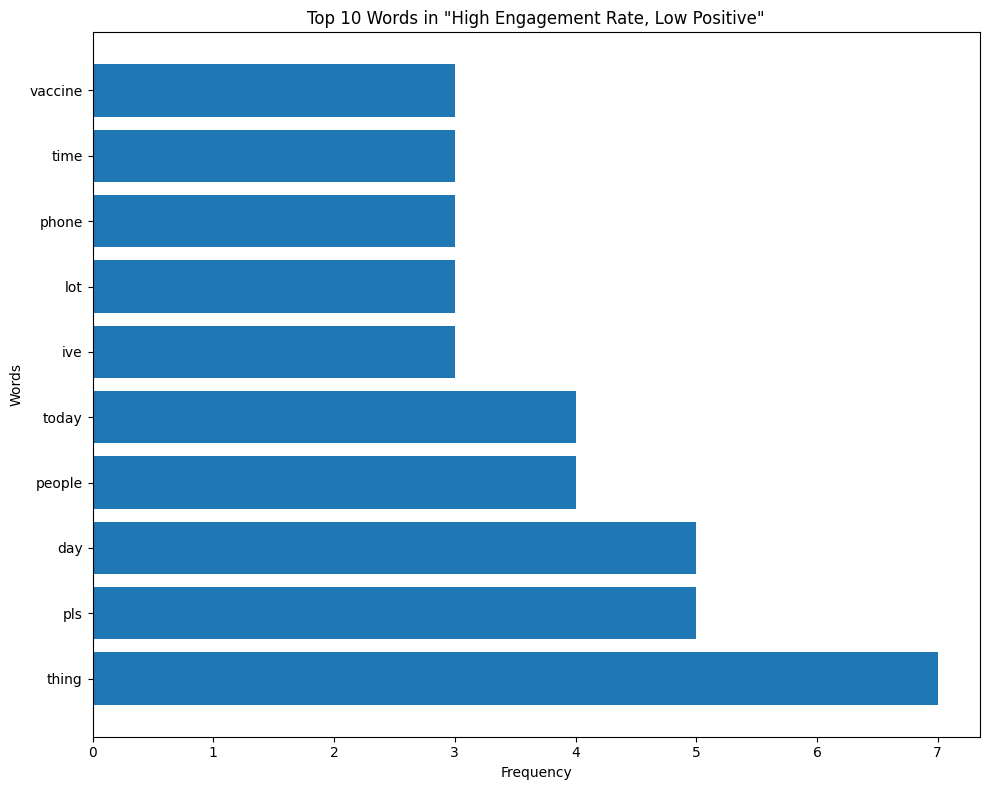

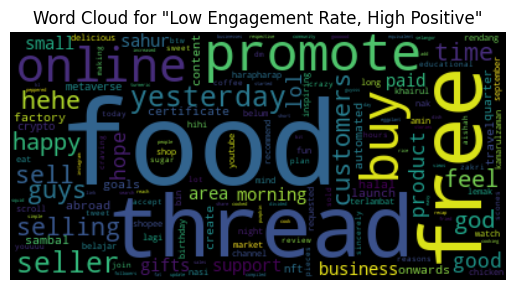

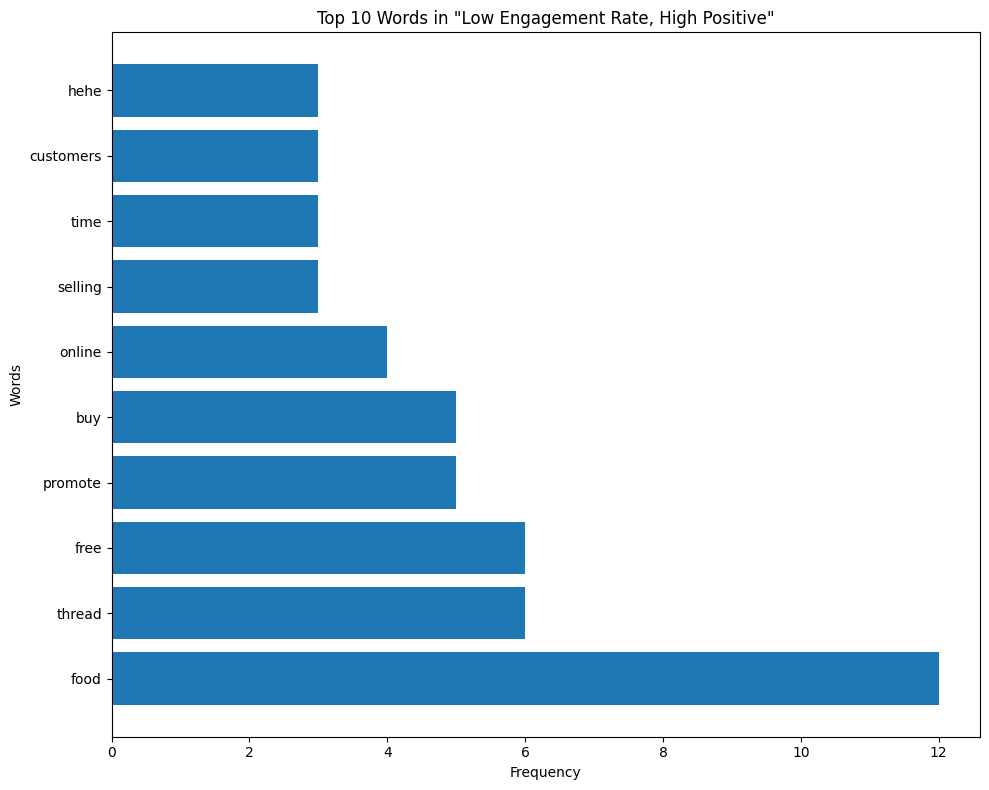

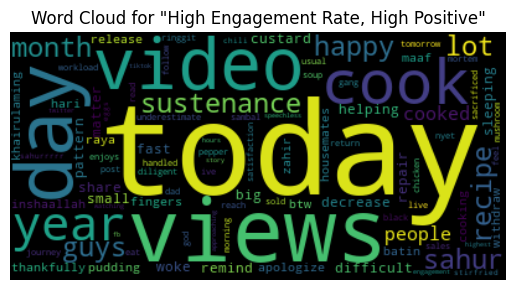

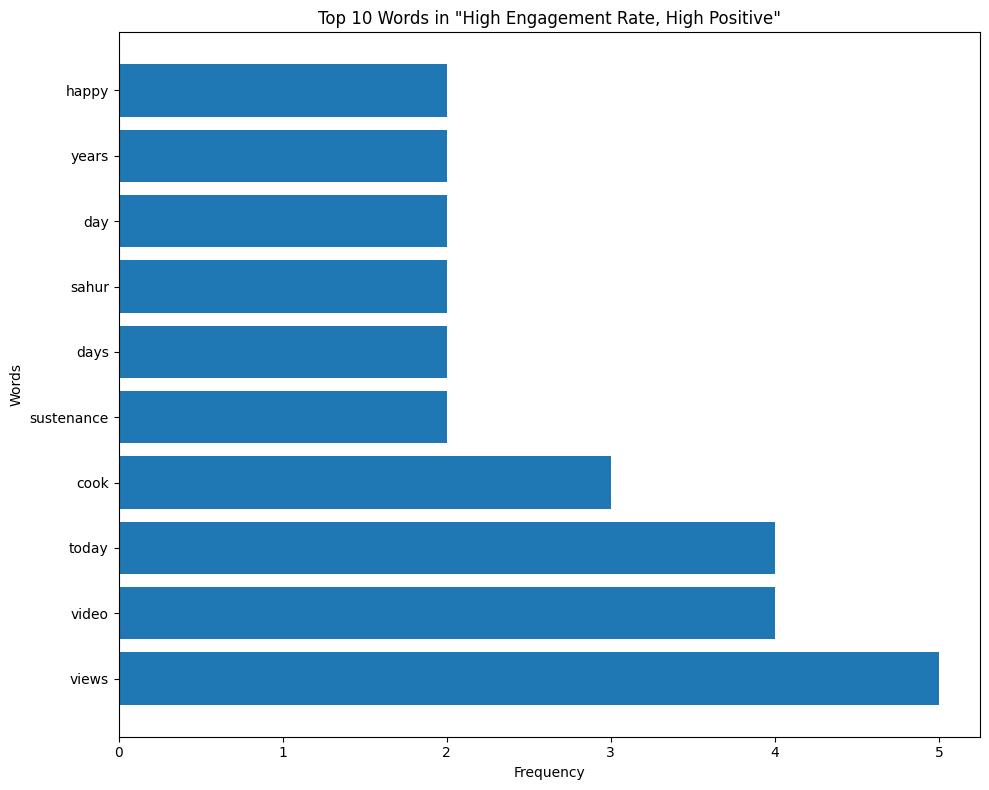

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

categories = [
    ('Low Engagement Rate', 'Low Positive', 'Low Engagement Rate, Low Positive'),
    ('High Engagement Rate', 'Low Positive', 'High Engagement Rate, Low Positive'),
    ('Low Engagement Rate', 'High Positive', 'Low Engagement Rate, High Positive'),
    ('High Engagement Rate', 'High Positive', 'High Engagement Rate, High Positive')
]

# Loop through the categories
for engagement_category, sentiment_category, title in categories:
    filtered_data = mainpost[(mainpost['Engagement Rate Category'] == engagement_category) & (mainpost['Sentiment Aggregation Category'] == sentiment_category)]
    text = ' '.join(filtered_data['translated cleaned'])

    # Generate word cloud
    wordcloud = WordCloud().generate(text)

    # Plot word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for "{title}"')
    plt.show()

    # Count the frequency of occurrences of each word
    word_frequency = Counter(text.split())

    # Get the top 20 words and their frequencies
    top_words = dict(word_frequency.most_common(10))
    sorted_words = list(top_words.keys())
    sorted_frequencies = list(top_words.values())

    # Increase the figure size
    plt.figure(figsize=(10, 8))

    # Create a horizontal bar chart
    plt.barh(sorted_words, sorted_frequencies, height=0.8)  # Increase the bar size

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top 10 Words in "{title}"')

    plt.tight_layout()  # Adjust the spacing
    plt.show()


In [10]:
training_dataset = result_celeb[pd.isna(result_celeb["SVM Predicted Label"])]
training_dataset 


,Unnamed: 0.1,Unnamed: 0,Username,Text,Date Created,Number of Likes,Number of Retweet,Number of Replies,Source of Tweet,User ID,Conversation ID,status,Category,translated,translated cleaned,sentiment Scores,sentiment,sentiment_label,SVM Predicted Label
0,81,81,altimet,Awal tak kalut. @pentas_io https://t.co/Ong5cl...,2021-10-11 09:16:54+00:00,810,207,81,Hootsuite Inc.,1447491388589973504,1447491388589973504,Main post,Celebrity,The beginning is not confusing. @pentas_io htt...,confusing,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.2263,Negative,NaN
1,82,82,altimet,"Kawan kawan, jiran jiran, perhatikan lah apa y...",2021-08-02 03:50:17+00:00,9738,7074,51,Hootsuite Inc.,1422042040288923650,1422042040288923650,Main post,Celebrity,"Friends, neighbors, neighbors, pay attention t...",friends neighbors neighbors pay attention happ...,"{'neg': 0.082, 'neu': 0.641, 'pos': 0.278, 'co...",0.5213,Positive,NaN
2,84,84,altimet,Setahun lepas. InsyaAllah kita boleh ulang lag...,2021-07-01 02:18:45+00:00,4200,2633,61,Hootsuite Inc.,1410422593413390337,1410422593413390337,Main post,Celebrity,A year ago. God willing we can repeat it again...,year ago god repeat,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.2732,Positive,NaN
3,87,87,AfikryAibrahim,Merajuk pulak😂 https://t.co/73hRlqTFfe,2021-02-16 09:48:35+00:00,45893,36137,826,Twitter for iPhone,1361613436979847171,1361613436979847171,Main post,Celebrity,Sulking again😂 https://t.co/73hRlqTFfe,sulking,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.3612,Negative,NaN
5,92,92,yunamusic,WOO!!!!! OMG Azreen Nabila did her PERSONAL BE...,2021-07-30 00:27:25+00:00,32174,15664,51,Twitter for iPhone,1420903822470254592,1420903822470254592,Main post,Celebrity,WOO!!!!! OMG Azreen Nabila did her PERSONAL BE...,woo omg azreen nabila personal morning womens ...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.4767,Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,10428,10428,ffatinxkeaii,@missfazura Saya tk jual lemang tp kalau Faz t...,2021-04-27 10:39:15+00:00,0,1,0,Twitter for iPhone,1386993337798856704,1386944023072440320,reply,Celebrity,"@missfazura I don't sell lemang, but if Faz wa...",sell lemang faz eat simple snack sambal thread...,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.4588,Positive,NaN
1051,10429,10429,nurulhanin4,"@missfazura you’re so pretty Fazura, the best ...",2021-04-27 10:39:48+00:00,2,0,0,Twitter for iPhone,1386993476118581248,1386944023072440320,reply,Celebrity,"@missfazura you’re so pretty Fazura, the best ...",pretty fazura ik melawati,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.4939,Positive,NaN
1053,10431,10431,yuszuri,@missfazura Sis. Saya ada satu tempat yg saya ...,2021-04-27 10:40:44+00:00,0,0,0,Twitter for Android,1386993709183500289,1386944023072440320,reply,Celebrity,@missfazura Sis. I have a place that I like to...,sis place buy member shop bangi lemang panjang...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.5719,Positive,NaN
1057,10448,10448,solmyskinshop,@missfazura Depan aeon au2 pun ada. Start dala...,2021-04-27 10:53:13+00:00,0,0,0,Twitter for Android,1386996851698663427,1386944023072440320,reply,Celebrity,@missfazura The front of the aeon au2 is also ...,aeon start days delicious famous setiawangsake...,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...",0.5719,Positive,NaN


# analyzing low recall value 

In [11]:
dataset = result_celeb
training_dataset = result_celeb[pd.isna(result_celeb["SVM Predicted Label"])]
pos_celeb =training_dataset[training_dataset["sentiment_label"] == "Positive"]
neg_celeb = training_dataset[training_dataset["sentiment_label"] == "Negative"]

false_predicted_negative = dataset[(dataset["SVM Predicted Label"] == 1) & (dataset["sentiment_label"] == "Negative")]

# Extract unique words from the "result_celeb" dataframe
unique_words = set()
for text in result_celeb["translated cleaned"]:
    unique_words.update(text.split())

# Create a new dataframe with the unique words
word_counts_df = pd.DataFrame({"Word": list(unique_words)})

# Count the occurrences of each word in the "pos_celeb" dataframe
pos_word_counts = {}
for word in unique_words:
    count = pos_celeb["translated cleaned"].str.count(word).sum()
    pos_word_counts[word] = count

# Add the word counts to the dataframe
word_counts_df["Count in Positive"] = word_counts_df["Word"].map(pos_word_counts)

# Count the occurrences of each word in the "neg_celeb" dataframe
neg_word_counts = {}
for word in unique_words:
    count = neg_celeb["translated cleaned"].str.count(word).sum()
    neg_word_counts[word] = count

# Add the word counts to the dataframe
word_counts_df["Count in Negative"] = word_counts_df["Word"].map(neg_word_counts)

word_counts_df["Label"] = word_counts_df.apply(lambda row: "Positive" if row["Count in Positive"] > row["Count in Negative"] 
                                               else ("Negative" if row["Count in Positive"] < row["Count in Negative"] 
                                                else "Neutral"), axis=1)

pos_word = word_counts_df[word_counts_df["Label"] == "Positive"]
neg_word = word_counts_df[word_counts_df["Label"] == "Negative"]
neut_word = word_counts_df[word_counts_df["Label"] == "Neutral"]

In [19]:
word_counts_df

,Word,Count in Positive,Count in Negative,Label
0,older,4,0,Positive
1,shake,0,0,Neutral
2,melted,0,1,Negative
3,takes,2,0,Positive
4,checkout,1,0,Positive
...,...,...,...,...
2624,persuading,0,1,Negative
2625,lalalala,1,0,Positive
2626,mia,0,1,Negative
2627,cooked,1,0,Positive


In [13]:
import pandas as pd

# Create an empty dataframe to store the results
percentage_df = pd.DataFrame({'Text': [], 'Percentage Positive': [], 'Percentage Negative': [], 'Percentage Neutral': []})

# Iterate through each text in false_predicted_negative["translated cleaned"]
for text in false_predicted_negative["translated cleaned"]:
    # Create an empty dataframe to store the word sentiments for the current text
    word_sentiment_df = pd.DataFrame({'Word': [], 'Sentiment': []})

    # Iterate through each word in the current text
    for word in text.split():
        sentiment = ''
        
        # Check if the word is in the positive word dataframe
        if word in pos_word['Word'].values:
            sentiment = 'Positive'
        # Check if the word is in the negative word dataframe
        elif word in neg_word['Word'].values:
            sentiment = 'Negative'
        # Check if the word is in the neutral word dataframe
        elif word in neut_word['Word'].values:
            sentiment = 'Neutral'
        
        # Add the word and its sentiment to the dataframe
        word_sentiment_df = word_sentiment_df.append({'Word': word, 'Sentiment': sentiment}, ignore_index=True)

    # Calculate the percentage of each sentiment category
    total_words = len(word_sentiment_df)
    percentage_positive = len(word_sentiment_df[word_sentiment_df['Sentiment'] == 'Positive']) / total_words * 100
    percentage_negative = len(word_sentiment_df[word_sentiment_df['Sentiment'] == 'Negative']) / total_words * 100
    percentage_neutral = len(word_sentiment_df[word_sentiment_df['Sentiment'] == 'Neutral']) / total_words * 100

    # Add the percentages for the current text to the results dataframe
    percentage_df = percentage_df.append({'Text': text,
                                          'Percentage Positive': percentage_positive,
                                          'Percentage Negative': percentage_negative,
                                          'Percentage Neutral': percentage_neutral},
                                         ignore_index=True)

# Display the dataframe
percentage_df


C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\1145450509.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_sentiment_df = word_sentiment_df.append({'Word': word, 'Sentiment': sentiment}, ignore_index=True)
C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\1145450509.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_sentiment_df = word_sentiment_df.append({'Word': word, 'Sentiment': sentiment}, ignore_index=True)
C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\1145450509.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_sentiment_df = word_sentiment_df.append({'Word': word, 'Sentiment': sentiment}, ignore_index=True)
C:\Users\Fikri\AppData\Local\Temp\ipykernel_21240\1145450509.py:26: FutureWarni

,Text,Percentage Positive,Percentage Negative,Percentage Neutral
0,younger generationabove understand struggle tr...,20.000000,10.000000,70.000000
1,filling independence miserable,33.333333,0.000000,66.666667
2,pru ill vote split halves ill vote syed sadiq ...,54.545455,0.000000,45.454545
3,repeat late people stressed,75.000000,0.000000,25.000000
4,wrongindeed punishment himbecause governs sure...,14.285714,0.000000,85.714286
5,long people follow soup factory opened hard re...,66.666667,11.111111,22.222222
6,violate medical practitioner ethics disciplina...,28.571429,14.285714,57.142857
7,aint funny doc real talk shizzy,50.000000,16.666667,33.333333
8,read profile bro reason tired,60.000000,20.000000,20.000000
9,rude,0.000000,100.000000,0.000000


In [30]:
word_counts_df[word_counts_df["Word"]=="headline"]

,Word,Count in Positive,Count in Negative,Label
142,headline,6,11,Negative


In [14]:
positive_count = len(percentage_df[percentage_df['Percentage Positive'] > percentage_df['Percentage Negative']])
negative_count = len(percentage_df[percentage_df['Percentage Positive'] < percentage_df['Percentage Negative']])
neutral_count = len(percentage_df[percentage_df['Percentage Positive'] == percentage_df['Percentage Negative']])

print("Number of texts with positive percentage greater than negative: ", positive_count)
print("Number of texts with negative percentage greater than positive: ", negative_count)
print("Number of texts with equal positive and negative percentages: ", neutral_count)


Number of texts with positive percentage greater than negative:  27
Number of texts with negative percentage greater than positive:  2
Number of texts with equal positive and negative percentages:  2


In [28]:
# Filter rows containing the keyword
rows_with_keywords =training_dataset[training_dataset['translated cleaned'].str.contains('insult', case=False)]

In [29]:
# Filter rows containing the keyword
rows_with_keywords

,Unnamed: 0.1,Unnamed: 0,Username,Text,Date Created,Number of Likes,Number of Retweet,Number of Replies,Source of Tweet,User ID,Conversation ID,status,Category,translated,translated cleaned,sentiment Scores,sentiment,sentiment_label,SVM Predicted Label


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Dummy data
data = ["I love cats",
        "Dogs are great",
        "Cats and dogs are friends"]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data using CountVectorizer
X = vectorizer.fit_transform(data)

# Get the feature names (tokens)
feature_names = vectorizer.get_feature_names()

# Print the tokenized sequences
for i, document in enumerate(X.toarray()):
    print(f"Document {i+1}: {document}")

# Print the feature names (tokens)
print("Feature Names:", feature_names)


Document 1: [0 0 1 0 0 0 1]
Document 2: [0 1 0 1 0 1 0]
Document 3: [1 1 1 1 1 0 0]
Feature Names: ['and', 'are', 'cats', 'dogs', 'friends', 'great', 'love']


c:\Users\Fikri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Dummy data
data = ["I love cats",
        "Dogs are great",
        "Cats and dogs are friends"]

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data using TfidfVectorizer
X = vectorizer.fit_transform(data)

# Get the feature names (tokens)
feature_names = vectorizer.get_feature_names()

# Print the TF-IDF representations
for i, document in enumerate(X.toarray()):
    print(f"Document {i+1}: {document}")

# Print the feature names (tokens)
print("Feature Names:", feature_names)


Document 1: [0.         0.         0.60534851 0.         0.         0.
 0.79596054]
Document 2: [0.         0.51785612 0.         0.51785612 0.         0.68091856
 0.        ]
Document 3: [0.51741994 0.3935112  0.3935112  0.3935112  0.51741994 0.
 0.        ]
Feature Names: ['and', 'are', 'cats', 'dogs', 'friends', 'great', 'love']
